## Reading & Pasing Data

In [1]:
import pandas as pd

In [3]:
# Update the path if necessary
file_path = 'Data/LI-Small_Trans.csv'
df = pd.read_csv(file_path)

In [5]:
print(df.head())

          Timestamp  From Bank    Account  To Bank  Account.1  \
0  2022/09/01 00:08         11  8000ECA90       11  8000ECA90   
1  2022/09/01 00:21       3402  80021DAD0     3402  80021DAD0   
2  2022/09/01 00:00         11  8000ECA90     1120  8006AA910   
3  2022/09/01 00:16       3814  8006AD080     3814  8006AD080   
4  2022/09/01 00:00         20  8006AD530       20  8006AD530   

   Amount Received Receiving Currency  Amount Paid Payment Currency  \
0       3195403.00          US Dollar   3195403.00        US Dollar   
1          1858.96          US Dollar      1858.96        US Dollar   
2        592571.00          US Dollar    592571.00        US Dollar   
3            12.32          US Dollar        12.32        US Dollar   
4          2941.56          US Dollar      2941.56        US Dollar   

  Payment Format  Is Laundering  
0   Reinvestment              0  
1   Reinvestment              0  
2         Cheque              0  
3   Reinvestment              0  
4   Reinvest

In [7]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6924049 entries, 0 to 6924048
Data columns (total 11 columns):
 #   Column              Dtype  
---  ------              -----  
 0   Timestamp           object 
 1   From Bank           int64  
 2   Account             object 
 3   To Bank             int64  
 4   Account.1           object 
 5   Amount Received     float64
 6   Receiving Currency  object 
 7   Amount Paid         float64
 8   Payment Currency    object 
 9   Payment Format      object 
 10  Is Laundering       int64  
dtypes: float64(2), int64(3), object(6)
memory usage: 581.1+ MB
None


In [9]:
print(df.isnull().sum())

Timestamp             0
From Bank             0
Account               0
To Bank               0
Account.1             0
Amount Received       0
Receiving Currency    0
Amount Paid           0
Payment Currency      0
Payment Format        0
Is Laundering         0
dtype: int64


In [11]:
print(df.describe())

          From Bank       To Bank  Amount Received   Amount Paid  \
count  6.924049e+06  6.924049e+06     6.924049e+06  6.924049e+06   
mean   5.938718e+04  8.441702e+04     6.324067e+06  4.676036e+06   
std    9.051700e+04  9.064562e+04     2.105371e+09  1.544099e+09   
min    0.000000e+00  0.000000e+00     1.000000e-06  1.000000e-06   
25%    2.190000e+02  1.125500e+04     1.742100e+02  1.753800e+02   
50%    1.419500e+04  2.964000e+04     1.397620e+03  1.399440e+03   
75%    1.106820e+05  1.480400e+05     1.229633e+04  1.222687e+04   
max    3.769670e+05  3.769670e+05     3.644854e+12  3.644854e+12   

       Is Laundering  
count   6.924049e+06  
mean    5.148722e-04  
std     2.268495e-02  
min     0.000000e+00  
25%     0.000000e+00  
50%     0.000000e+00  
75%     0.000000e+00  
max     1.000000e+00  


In [13]:
print(df.dtypes)

Timestamp              object
From Bank               int64
Account                object
To Bank                 int64
Account.1              object
Amount Received       float64
Receiving Currency     object
Amount Paid           float64
Payment Currency       object
Payment Format         object
Is Laundering           int64
dtype: object


In [15]:
print(df.nunique())

Timestamp               14533
From Bank               41814
Account                681281
To Bank                 21588
Account.1              576176
Amount Received       1194921
Receiving Currency         15
Amount Paid           1204309
Payment Currency           15
Payment Format              7
Is Laundering               2
dtype: int64


In [16]:
print(df.duplicated().sum())

8


# Data Visualization

In [20]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [22]:
# Convert Timestamp to datetime format
df['Timestamp'] = pd.to_datetime(df['Timestamp'])

1. Time Series Analysis - Transaction Amounts Over Time
python
Copy
Edit


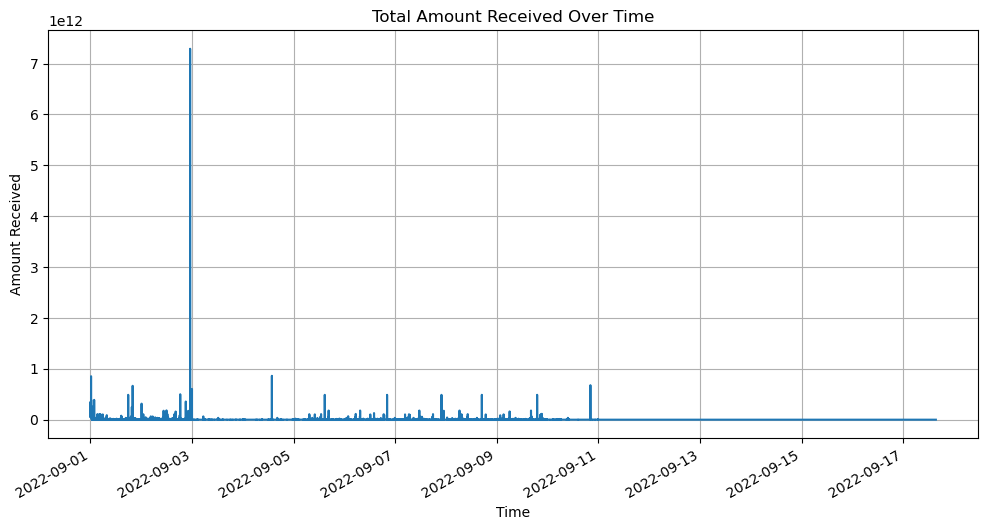

In [25]:
plt.figure(figsize=(12, 6))
df.groupby('Timestamp')['Amount Received'].sum().plot()
plt.title('Total Amount Received Over Time')
plt.xlabel('Time')
plt.ylabel('Amount Received')
plt.grid(True)
plt.show()

3. Count of Transactions by Receiving and Payment Currency
python
Copy
Edit


C:\Users\HP\AppData\Local\Temp\ipykernel_7408\4150711529.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Receiving Currency', data=df, palette='viridis')
C:\Users\HP\AppData\Local\Temp\ipykernel_7408\4150711529.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Payment Currency', data=df, palette='magma')


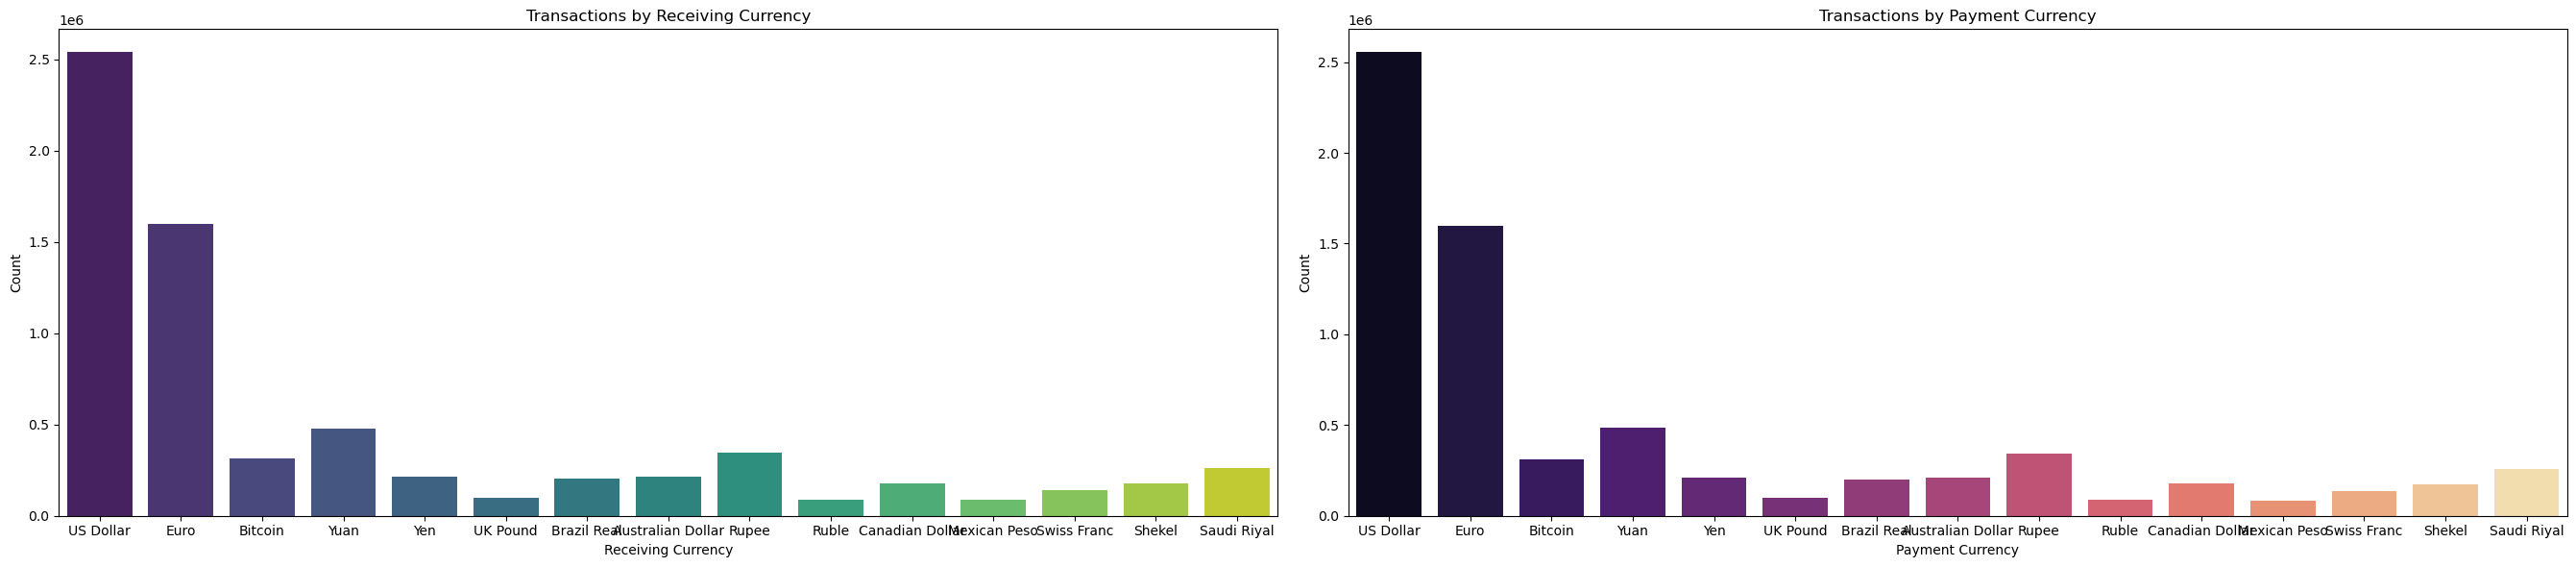

In [28]:
plt.figure(figsize=(27, 6))

plt.subplot(1, 2, 1)
sns.countplot(x='Receiving Currency', data=df, palette='viridis')
plt.title('Transactions by Receiving Currency')
plt.xlabel('Receiving Currency')
plt.ylabel('Count')
plt.subplot(1, 2, 2)
sns.countplot(x='Payment Currency', data=df, palette='magma')
plt.title('Transactions by Payment Currency')
plt.xlabel('Payment Currency')
plt.ylabel('Count')
plt.tight_layout()
plt.show()


4. Distribution of Payment Formats
python
Copy
Edit


C:\Users\HP\AppData\Local\Temp\ipykernel_7408\4064738281.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Payment Format', data=df, palette='cool')


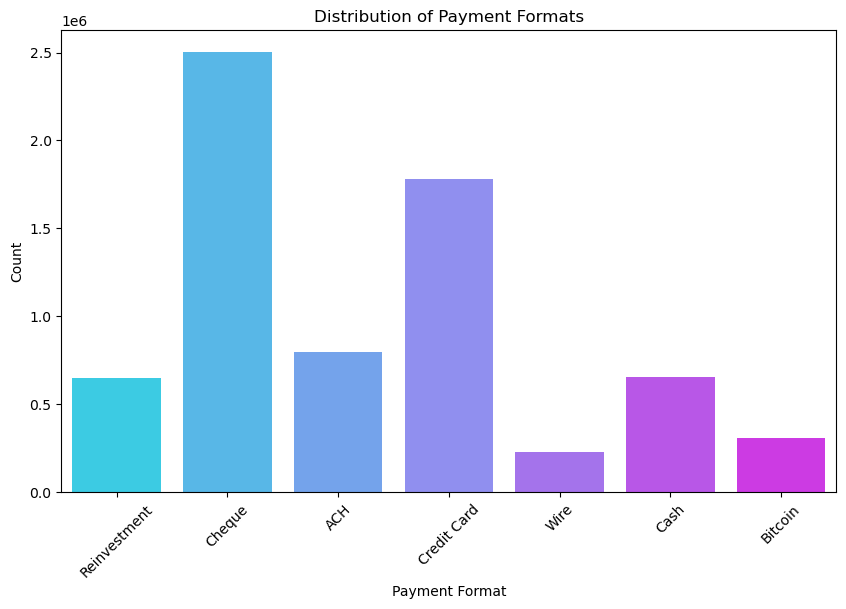

In [30]:
plt.figure(figsize=(10, 6))
sns.countplot(x='Payment Format', data=df, palette='cool')
plt.title('Distribution of Payment Formats')
plt.xlabel('Payment Format')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()

5. Laundering Analysis - Comparing Amounts for Laundering vs. Non-Laundering
python
Copy
Edit


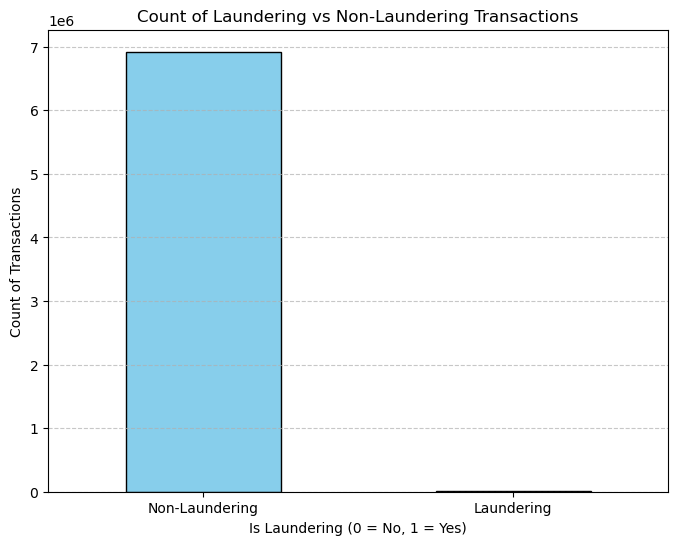

In [32]:
# Count the occurrences of each category
laundering_counts = df['Is Laundering'].value_counts().sort_index()

# Create a column chart
plt.figure(figsize=(8, 6))
laundering_counts.plot(kind='bar', color=['skyblue', 'salmon'], edgecolor='black')

# Add labels and title
plt.title('Count of Laundering vs Non-Laundering Transactions')
plt.xlabel('Is Laundering (0 = No, 1 = Yes)')
plt.ylabel('Count of Transactions')
plt.xticks(ticks=[0, 1], labels=['Non-Laundering', 'Laundering'], rotation=0)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

In [33]:
laundering_counts = df['Is Laundering'].value_counts()


In [34]:
print(laundering_counts)

Is Laundering
0    6920484
1       3565
Name: count, dtype: int64


## Results